### ICU住院患者

In [1]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)

df = deepcopy(adm_pn)
df = df.loc[df["ICU_adm"]==1]
df['admittime'] = pd.to_datetime(df['intime'])
df['dischtime'] = pd.to_datetime(df['outtime'])
df['time_diff'] = (df['dischtime'] - df['admittime']).dt.days
print(df.loc[df["mixed_infection"]=="BACT","time_diff"].mean(),df.loc[df["mixed_infection"]=="VIRUS","time_diff"].mean())

8.180709534368072 4.191891891891892


### Sepsis

       removed  observed  censored  entrance  at_risk  KM_estimate
0.0       1538      1531         7      2423     2423     0.368139
1.0        136       113        23         0      885     0.321133
2.0        100        70        30         0      749     0.291121
3.0         91        46        45         0      649     0.270487
4.0         77        32        45         0      558     0.254975
5.0         74        23        51         0      481     0.242783
6.0         65        17        48         0      407     0.232642
7.0         51         9        42         0      342     0.226520
8.0         38        11        27         0      291     0.217957
9.0         35         6        29         0      253     0.212788
10.0        27         9        18         0      218     0.204003
11.0        20         5        15         0      191     0.198663
12.0        23         4        19         0      171     0.194016
13.0        23         2        21         0      148     0.19

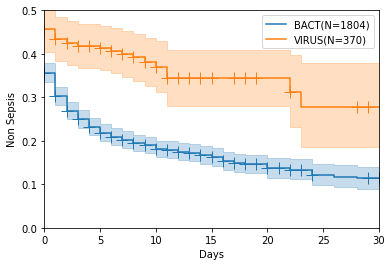

6.109496474953583e-11


In [5]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
adm_pn = deepcopy(adm_pn.loc[adm_pn["ICU_adm"]==1])
sofa = pd.read_csv("concepts/spesis/sepsis3.csv")
df = pd.merge(adm_pn, sofa, how="left")
df = df.loc[df["ICU_adm"]==1]
df["sepsis_event"] = 1
df.loc[df["sofa_score"].isna(),"sepsis_event"] = 0
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['sofa_time'] = pd.to_datetime(df['sofa_time'],format = "%d/%m/%Y %H:%M:%S")

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['sofa_time'] - row['admittime']).days if row['sepsis_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 第一次sepsis时间
survival_d = df.groupby(['hadm_id', 'subject_id', 'mixed_infection','sepsis_event']).min().reset_index()
from survival_curve import survival_curve
survival_curve(survival_d,"time_diff","sepsis_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Non Sepsis",[0,30],[0,0.5])
# survival_d.to_csv("pneumonia/outcome_hospdeath.csv")

### 机械通气

        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0         37        37         0      2423     2423     0.984730
 0.0       1026      1019         7         0     2386     0.564177
 1.0        136       109        27         0     1360     0.518960
 2.0        135        85        50         0     1224     0.482921
 3.0        139        54        85         0     1089     0.458974
 4.0        134        38        96         0      950     0.440615
 5.0        134        34       100         0      816     0.422256
 6.0        114        18        96         0      682     0.411112
 7.0         81        10        71         0      568     0.403874
 8.0         70        12        58         0      487     0.393922
 9.0         69         9        60         0      417     0.385420
 10.0        51         6        45         0      348     0.378775
 11.0        40         5        35         0      297     0.372398
 12.0        35         5        30         0   

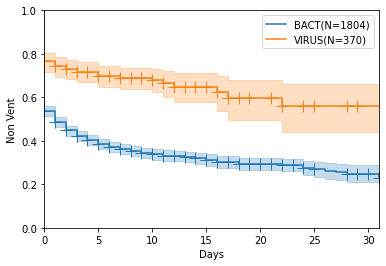

1.8202577022532605e-25


In [6]:
import pandas as pd
from copy import deepcopy
from survival_curve import survival_curve
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
ventil = pd.read_csv("concepts/treatment/ventilation.csv")
ventil = ventil.loc[ventil["ventilation_status"].isin(["InvasiveVent","Tracheostomy"])]
df = pd.merge(adm_pn, ventil, how="left")
df = df.loc[df["ICU_adm"]==1]
df["ventilation_event"] = 1
df.loc[df["ventilation_status"].isna(),"ventilation_event"] = 0

df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['starttime'] = pd.to_datetime(df['starttime'],format = "%d/%m/%Y %H:%M:%S")

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['starttime'] - row['admittime']).days if row['ventilation_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 第一次插管时间
df = df.groupby(['hadm_id', 'subject_id', 'mixed_infection','ventilation_event']).min().reset_index()
from survival_curve import survival_curve
survival_curve(df,"time_diff","ventilation_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Non Vent",[0,31],[0,1])

### ICU患者病死率

        removed  observed  censored  entrance  at_risk  KM_estimate
-1.0          1         1         0      2690     2690     0.999628
 0.0         24        15         9         0     2689     0.994052
 1.0         60        19        41         0     2665     0.986965
 2.0         87        23        64         0     2605     0.978251
 3.0        136        20       116         0     2518     0.970481
...         ...       ...       ...       ...      ...          ...
 90.0         1         0         1         0        7     0.390952
 100.0        2         2         0         0        6     0.260635
 114.0        1         0         1         0        4     0.260635
 122.0        2         0         2         0        3     0.260635
 145.0        1         0         1         0        1     0.260635

[78 rows x 6 columns]


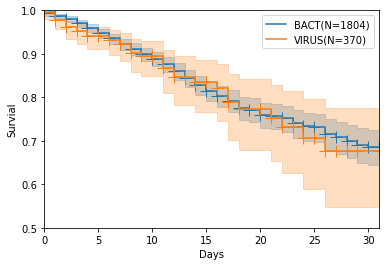

6.024564482659053e-01


In [8]:
import pandas as pd
from copy import deepcopy
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
df = deepcopy(adm_pn)
df = df.loc[adm_pn["ICU_adm"]==1]

df['dischtime'] = pd.to_datetime(df['dischtime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])
df['intime'] = pd.to_datetime(df['intime'])

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['deathtime'] - row['intime']).days if row['death_event'] == 1 else (row['dischtime'] - row['intime']).days, axis=1)

# ICU死亡事件
from survival_curve import survival_curve
survival_curve(df,"time_diff","death_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Survial",[0,31],[0.5,1])
df.to_csv("pneumonia/outcome_hospdeath.csv")

### ICU患者31天病死率

In [20]:
import pandas as pd
adm_pn = pd.read_csv("pneumonia/adm_pn.csv", index_col=0)
adm_pn = adm_pn.loc[adm_pn["ICU_adm"]==1]
patients = pd.read_csv("../MIMIC-IV/mimic-iv-2/hosp/patients.csv")
patients['dod'] = pd.to_datetime(patients['dod']).dt.strftime('%Y-%m-%d') + " 00:00:00"
# 使用merge函数将两个数据框按照subject_id列进行合并
merged_df = pd.merge(adm_pn, patients[['subject_id', 'dod']], on='subject_id', how='left')
# 将第二个数据框中的DOD列的值替换第一个数据框中的deathtime列的值
merged_df['deathtime'] = merged_df['deathtime'].combine_first(merged_df['dod'])
# 删除多余的列（dod列）
merged_df = merged_df.drop('dod', axis=1)

df = deepcopy(merged_df)
df['admittime'] = pd.to_datetime(df['admittime'])
df['dischtime'] = pd.to_datetime(df['dischtime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])

# 计算时间差并提取天数
df['time_diff'] = df.apply(lambda row: (row['deathtime'] - row['admittime']).days if row['death_event'] == 1 else (row['dischtime'] - row['admittime']).days, axis=1)

# 住院死亡事件
from survival_curve import survival_curve
survival_curve(df,"time_diff","death_event",'mixed_infection',"BACT","VIRUS","BACT","VIRUS","Days","Survial",[0,31],[0.5,1])